## 중심극한정리
- 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다.

   

* $\lambda=2$인 Exponential Distribution을 따르는 표본을 난수 발생기를 이용하여 생성한다.
* 각 표본 크기는 n_sample이며 우리는 이러한 표본을 n_exp만큼 생성하고자 한다. 즉 rvs(n_sample \* n_exp)를 호출하여 n_sample \* n_exp 만큼의 난수를 생성한다.
* [numpy.reshape](https://www.w3schools.com/python/numpy/numpy_array_reshape.asp) 를 이용하여 생성한 난수들을 표본 크기가 n_sample인 n_exp개의 표본으로 변형한 2차원 배열 rval_array로 저장한다.
* 개별 표본의 표본평균(Sample Mean)을 구하여 xbars에 저장하였다.
* 우리는 이 표본평균의 분포에 근사하는 정규분포를 위한 변수인 g_rv를 만들려고 한다. 
* 우리는 결과를 그래프를 통해 확인하려한다. 
* ax1에는 생성한 난수 값 전체(개수 : n_sample * n_exp)의 분포를 exponential 분포의 이론적 확률값과 비교하여 표시한다.
* ax2에는 표본 평균의 분포를 표시하는데 표본 평균 $\bar X$ 의 도수 분포 비율을 histogram으로 표시하고 이에 근사하는 정규 분포의 확률값을 함께 표현하려 하였다. 

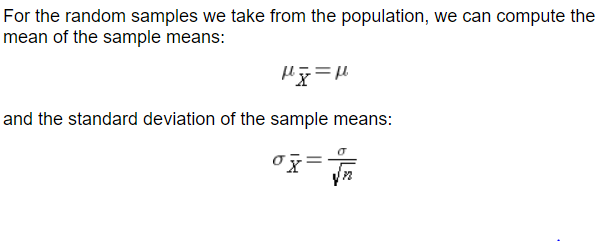

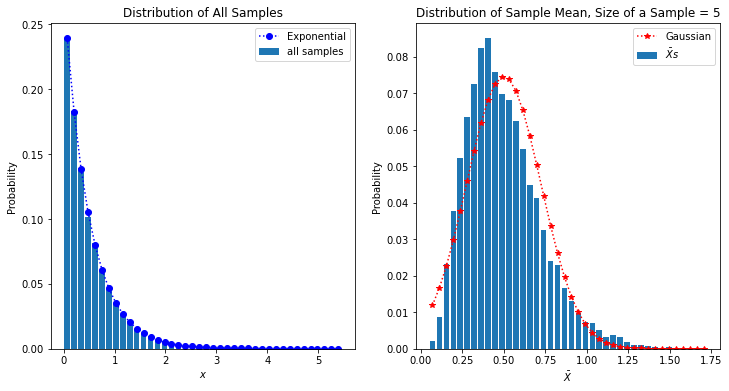

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

np.random.seed(seed=1000)
n_sample =  5#@param {type:"integer"}
n_exp = 10000
Rate = 2

s_rv = stats.expon(scale = 1/Rate)
# mean(s_rv)
#========== SET THE PARAMETERS PROPERLY ================= 
g_rv = stats.norm(loc = 1/Rate, scale = s_rv.std()/math.sqrt(n_sample))
#========================================================

rval_array = s_rv.rvs(n_sample * n_exp).reshape((n_exp, n_sample))
xbars = rval_array.mean(1)

plt.rcParams['figure.figsize'] = [12,6]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

counts1, bins1 = np.histogram(rval_array,40)
counts1 = counts1/sum(counts1)
ax1.hist(bins1[:-1], bins1, weights=counts1, rwidth = 0.8, label='all samples')
ax1.plot((bins1[1:]+bins1[:-1])/2, s_rv.cdf(bins1[1:])-s_rv.cdf(bins1[:-1]), "b:o", label='Exponential')
ax1.set_title('Distribution of All Samples')
ax1.set_xlabel('$x$')
ax1.set_ylabel('Probability')
ax1.legend()

counts2, bins2 = np.histogram(xbars, 40)
counts2 = counts2/sum(counts2)
ax2.hist(bins2[:-1], bins2, weights=counts2, rwidth = 0.8, label='$\\bar{X}s$')
ax2.plot((bins2[1:]+bins2[:-1])/2, g_rv.cdf(bins2[1:])-g_rv.cdf(bins2[:-1]), "r:*", label='Gaussian')
ax2.set_title('Distribution of Sample Mean, Size of a Sample = {}'.format(n_sample))
ax2.set_xlabel('$\\bar{X}$')
ax2.set_ylabel('Probability')
ax2.legend()

plt.show()
